In [2]:
from skimage import io,filters, morphology, measure, draw,exposure
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import trackpy as tp
import pandas as pd
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit
from sklearn.neighbors import KernelDensity
from skimage.filters import threshold_otsu, threshold_multiotsu
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pingouin import ancova

In [3]:
PATH = "<PATH/TO/DIR>/WAVE/Fig5BC_B16KO/"

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Generate plots

In [5]:
KO_lamel_1 = pd.read_csv(PATH + 'csv_files/KO_lamel_1.csv',index_col=0)
KO_lamel_2 = pd.read_csv(PATH + 'csv_files/KO_lamel_2.csv',index_col=0)
KO_lamel_3= pd.read_csv(PATH + 'csv_files/KO_lamel_3.csv',index_col=0)
WT_lamel_1 = pd.read_csv(PATH + 'csv_files/WT_lamel_1.csv',index_col=0)
WT_lamel_2 = pd.read_csv(PATH + 'csv_files/WT_lamel_2.csv',index_col=0)
WT_lamel_3 = pd.read_csv(PATH + 'csv_files/WT_lamel_3.csv',index_col=0)

In [6]:
ave_WT_lamel = pd.DataFrame()
p = 0
for cell in np.unique(WT_lamel_1.cells):
    cur = WT_lamel_1[WT_lamel_1['cells'] == cell]
    ave_WT_lamel.at[p,'threshold'] = cur.threshold.mean()
    ave_WT_lamel.at[p,'WT'] = (cur.final_intensity/cur.perimeter).mean()
    p+=1
for cell in np.unique(WT_lamel_2.cells):
    cur = WT_lamel_2[WT_lamel_2['cells'] == cell]
    ave_WT_lamel.at[p,'threshold'] = cur.threshold.mean()
    ave_WT_lamel.at[p,'WT'] = (cur.final_intensity/cur.perimeter).mean()
    p+=1
for cell in np.unique(WT_lamel_3.cells):
    cur = WT_lamel_3[WT_lamel_3['cells'] == cell]
    ave_WT_lamel.at[p,'threshold'] = cur.threshold.mean()
    ave_WT_lamel.at[p,'WT'] = (cur.final_intensity/cur.perimeter).mean()
    p+=1
print(ave_WT_lamel)

     threshold          WT
0    91.147095  367.640838
1    39.750004  130.104930
2    31.780546  107.460558
3    73.938889  276.633972
4    67.145805  258.186234
5    72.148079  314.694766
6    64.935478  255.927124
7    85.482082  347.249990
8    78.548492  263.954329
9    95.350273  420.658927
10   49.011459  163.868334
11   86.454063  380.374569
12   99.295761  374.824358
13   86.120804  243.032058
14   69.270992  239.701138
15   81.729355  299.143547
16   92.808533  392.979946
17   85.973122  305.682634
18   81.332779  307.497425
19   76.833267  279.870427
20   84.618084  358.294983
21   64.596680  231.850635
22  134.176079  567.781115
23   60.805962  240.771087
24   79.431511  293.767163
25   38.314240  142.383735
26   64.261608  227.918370
27   58.575771  277.676319
28   90.579411  368.717867
29   64.700363  254.985970
30   75.052826  325.460262
31   55.760143  264.417256
32   73.115170  406.767012
33   62.429384  271.188412
34   70.913376  273.334946
35   66.433479  278.874234
3

In [7]:
ave_KO_lamel = pd.DataFrame()
p = 0
for cell in np.unique(KO_lamel_1.cells):
    cur = KO_lamel_1[KO_lamel_1['cells'] == cell]
    ave_KO_lamel.at[p,'threshold'] = cur.threshold.mean()
    ave_KO_lamel.at[p,'KO'] = (cur.final_intensity/cur.perimeter).mean()
    p+=1

for cell in np.unique(KO_lamel_2.cells):
    cur = KO_lamel_2[KO_lamel_2['cells'] == cell]
    ave_KO_lamel.at[p,'threshold'] = cur.threshold.mean()
    ave_KO_lamel.at[p,'KO'] = (cur.final_intensity/cur.perimeter).mean()
    p+=1
for cell in np.unique(KO_lamel_3.cells):
    cur = KO_lamel_3[KO_lamel_3['cells'] == cell]
    ave_KO_lamel.at[p,'threshold'] = cur.threshold.mean()
    ave_KO_lamel.at[p,'KO'] = (cur.final_intensity/cur.perimeter).mean()
    p+=1
print(ave_KO_lamel)

     threshold          KO
0    67.977943  344.911341
1    62.561249  293.391895
2    96.365036  445.765308
3    63.064220  281.453977
4    84.721001  381.477173
5    74.912886  354.146257
6    83.818584  369.873113
7    68.185951  280.086357
8    75.443047  258.261549
9   102.015278  363.882567
10   58.848114  213.906832
11   87.901237  307.348255
12   97.215492  473.098201
13   70.323349  285.550735
14  122.896065  444.244424
15   76.523273  279.588825
16   88.925880  334.882081
17   62.082806  236.437224
18  110.457146  430.030650
19  111.301857  474.304697
20   45.416695  181.805777
21  104.480728  390.139399
22   77.060139  312.636389
23   78.567516  247.500075
24   67.121475  211.890338
25   67.191597  234.232504
26   82.908939  302.493057
27   74.010185  255.640331
28  100.600227  359.197074
29   87.023178  421.002922
30   90.805237  384.865578
31  100.996956  512.044039
32   75.401695  322.655644
33   68.388428  223.244911
34   70.722912  301.545557
35   88.707497  360.841151
3

In [8]:
ave_KO_lamel['unit length intensity'] = ave_KO_lamel['KO']
ave_KO_lamel['group'] = 'KO'
ave_WT_lamel['unit length intensity'] = ave_WT_lamel['WT']
ave_WT_lamel['group'] = 'WT'

In [9]:
ave_KO_lamel = ave_KO_lamel.drop(['KO'],axis = 1)
ave_WT_lamel = ave_WT_lamel.drop(['WT'],axis = 1)

In [10]:
ave_lamel = ave_KO_lamel.append(ave_WT_lamel)

In [11]:
ancova(data=ave_lamel, dv='threshold', covar='unit length intensity', between='group')

,Source,SS,DF,F,p-unc,np2
0,group,38.790716,1,0.540857,4.639689e-01,0.005908
1,unit length intensity,22672.593634,1,316.123088,2.337165e-31,0.776480
2,Residual,6526.590747,91,NaN,NaN,NaN


In [12]:
result = pd.DataFrame()
result['WT'] = ave_WT_lamel['unit length intensity']/ave_WT_lamel['threshold']
result['KO'] = ave_KO_lamel['unit length intensity']/ave_KO_lamel['threshold']


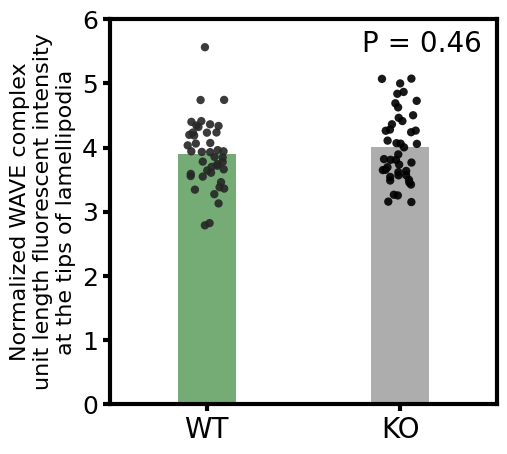

In [13]:
_,ax = plt.subplots(figsize = (5,5))
c = ['#48a446','#999999']
sns.barplot(result,width = 0.3,palette=c,alpha = 0.8,errwidth = 0)
sns.stripplot(result,color = 'black',size = 6,alpha = 0.9,edgecolor = 'black')
plt.ylim(0,6)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.yticks(size = 18)
plt.xticks(size = 20)
plt.text(0.8,5.5,'P = 0.46',size = 20)
plt.ylabel('Normalized WAVE complex\nunit length fluorescent intensity\nat the tips of lamellipodia',size = 16)
plt.savefig(PATH + 'result_figures/Fig5B_lamellipodia.png',dpi = 300,bbox_inches = 'tight')

In [14]:
WT_rings_1 = pd.read_csv(PATH + 'csv_files/WT_rings.csv',index_col=0)
WT_rings_2 = pd.read_csv(PATH + 'csv_files/WT_rings_2.csv',index_col=0)
KO_rings_1 = pd.read_csv(PATH + 'csv_files/KO_rings.csv',index_col=0)
KO_rings_2 = pd.read_csv(PATH + 'csv_files/KO_rings_2.csv',index_col=0)

In [15]:
ave_WT_dia = pd.DataFrame()
ave_WT_intens = pd.DataFrame()
p = 0
for cell in np.unique(WT_rings_1.cells):
    cur = WT_rings_1[WT_rings_1['cells'] == cell]
    ave_WT_dia.at[p,'WT'] = cur['diameter(nm)'].mean()
    ave_WT_intens.at[p,'WT'] = cur.final_intensity.mean()
    p+=1
for cell in np.unique(WT_rings_2.cells):
    cur = WT_rings_2[WT_rings_2['cells'] == cell]
    ave_WT_dia.at[p,'WT'] = cur['diameter(nm)'].mean()
    ave_WT_intens.at[p,'WT'] = cur.final_intensity.mean()
    p+=1

In [16]:
ave_KO_dia = pd.DataFrame()
ave_KO_intens = pd.DataFrame()
p = 0
for cell in np.unique(KO_rings_1.cells):
    cur = KO_rings_1[KO_rings_1['cells'] == cell]
    ave_KO_dia.at[p,'KO'] = cur['diameter(nm)'].mean()
    ave_KO_intens.at[p,'KO'] = cur.final_intensity.mean()
    p+=1
for cell in np.unique(KO_rings_2.cells):
    cur = KO_rings_2[KO_rings_2['cells'] == cell]
    ave_KO_dia.at[p,'KO'] = cur['diameter(nm)'].mean()
    ave_KO_intens.at[p,'KO'] = cur.final_intensity.mean()
    p+=1


In [17]:
ave_dia = ave_WT_dia.append(ave_KO_dia)
ave_intens = ave_WT_intens.append(ave_KO_intens)

In [18]:
stats.ttest_ind(ave_KO_dia['KO'],ave_WT_dia['WT'])

Ttest_indResult(statistic=0.6674521125417291, pvalue=0.5083160308107918)

In [19]:
stats.ttest_ind(ave_KO_intens['KO'],ave_WT_intens['WT'])

Ttest_indResult(statistic=0.555888439175411, pvalue=0.5813834225284467)

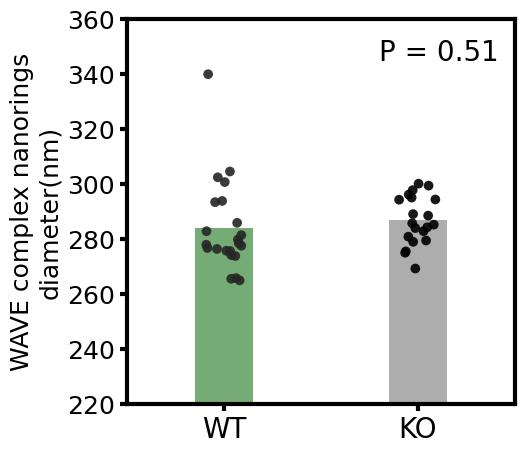

In [20]:
_,ax = plt.subplots(figsize = (5,5))
c = ['#48a446','#999999']
sns.barplot(ave_dia,width = 0.3,palette=c,alpha = 0.8,errwidth = 0)
sns.stripplot(ave_dia,color = 'black',size = 7,alpha = 0.9,edgecolor = 'black')
plt.ylim(220,360)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.yticks(size = 18)
plt.xticks(size = 20)
plt.text(0.8,345,'P = 0.51',size = 20)
plt.ylabel('WAVE complex nanorings\ndiameter(nm)',size = 18)
plt.savefig(PATH +'result_figures/Fig5C_rings_diameter.png',bbox_inches= 'tight',dpi = 300)

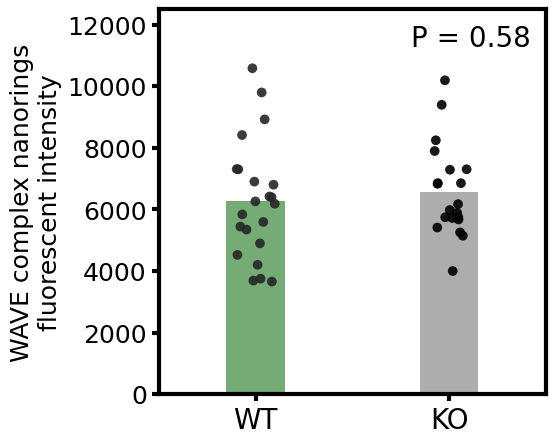

In [21]:
_,ax = plt.subplots(figsize = (5,5))
c = ['#48a446','#999999']
sns.barplot(ave_intens,width = 0.3,palette=c,alpha = 0.8,errwidth = 0)
sns.stripplot(ave_intens,color = 'black',size = 7,alpha = 0.9,edgecolor = 'black')
plt.ylim(0,12500)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.yticks(size = 18)
plt.xticks(size = 20)
plt.text(0.8,11300,'P = 0.58',size = 20)
plt.ylabel('WAVE complex nanorings\nfluorescent intensity',size = 18)
plt.savefig(PATH +'result_figures/Fig5C_rings_intensity.png',bbox_inches= 'tight',dpi = 300)